In [1]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Loading the data, and splitting into train and test data
# Inbuilt Dataset in Tensorflow
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

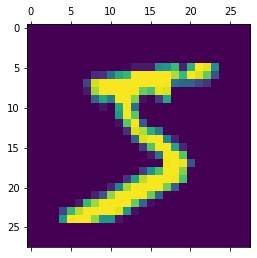

In [6]:
plt.matshow(X_train[0])

In [7]:
# Normalizing the training data
X_train = X_train / 255
X_test = X_test / 255

## Building Simple ANN for Classification

In [8]:
# Defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2748 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1257 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [11]:
# Evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9744


[0.09768418967723846, 0.974399983882904]

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## Building CNN for Classification

In [14]:
# Defining the model
model = keras.Sequential([
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1574 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0157 - accuracy: 0.9949


In [17]:
# Evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0388 - accuracy: 0.9873


[0.038812056183815, 0.9872999787330627]

#### *As model accuracy of CNN (98.72999787330627) is greater than simple ANN (97.4399983882904), CNN is a better model for classifying the Hand written digits.*